In [413]:
#Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [414]:
# reading csv file
df=pd.read_csv("Linear Regression Sale Prediction.csv")

In [415]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [416]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [417]:
# checking null values
df.isna().sum()/len(df)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

#### Insights: 
    1. According to above data we can see that 2 variables Item_Weight has 17.16% null values & Outlet_Size has 28.27% null values.
    2. The percentage of Null values is greater than 4% and less than 40% so null values should be filled with mean and mode respectively.

<AxesSubplot:xlabel='Item_Weight'>

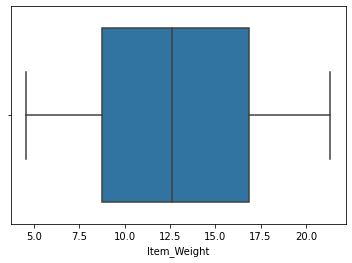

In [418]:
sns.boxplot(df['Item_Weight'])

In [419]:
# Filling Null values of Item_Weight by mean.
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [420]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [421]:
mode_size=df['Outlet_Size'].mode()

In [422]:
# Filling Null values of Outlet_Size by mode
df['Outlet_Size']=df['Outlet_Size'].fillna(mode_size[0])

In [423]:
df.isna().sum()/len(df)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [424]:
# Checking Garbage values

In [425]:
for i in df.select_dtypes("O").columns:
    print(i)
    print(df[i].unique())

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size
['Medium' 'High' 'Small']
Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


#### Insights: 
    1. Item_Fat_Content has same meaning value of Low Fat as LF and low fat & Regular as reg.

In [426]:
df['Item_Fat_Content']=df['Item_Fat_Content'].str.replace("low fat","Low Fat")

In [427]:
df['Item_Fat_Content']=df['Item_Fat_Content'].str.replace("LF","Low Fat")

In [428]:
df['Item_Fat_Content']=df['Item_Fat_Content'].str.replace("reg","Regular")

In [429]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

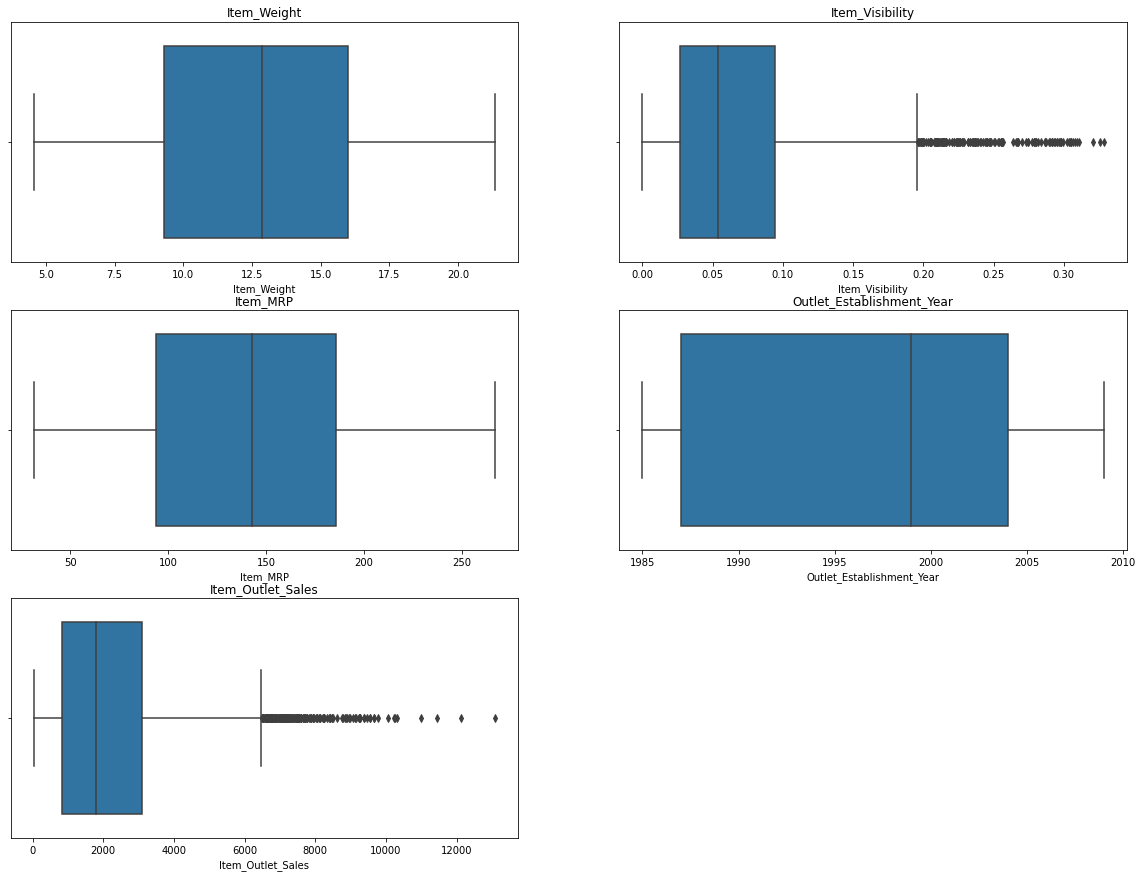

In [430]:
# Checking Outtliers in Numeric Columns.
plt.figure(figsize=(20,15))
count=1
for i in df.select_dtypes(["float",'int']).columns:
    plt.subplot(3,2,count)
    plt.title(i)
    sns.boxplot(df[i])
    count+=1

#### Insights:
    1. Item_Visiblity & Item_Outlet_Sales has Outliers

In [431]:
# removing outliers from item visiblity greater than 0.18
df=df[df['Item_Visibility']<0.18]

<AxesSubplot:xlabel='Item_Visibility'>

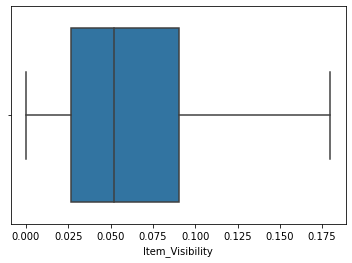

In [432]:
sns.boxplot(df['Item_Visibility'])

In [433]:
# removing outliers from item outlet sales greater than 6000
df=df[df['Item_Outlet_Sales']<6000]

<AxesSubplot:xlabel='Item_Outlet_Sales'>

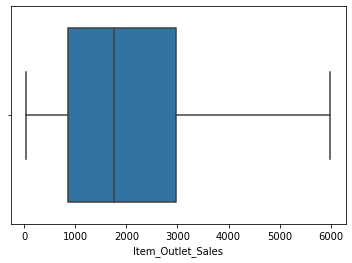

In [434]:
sns.boxplot(df['Item_Outlet_Sales'])

In [435]:
df.reset_index(inplace=True)

In [436]:
df

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8002,8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8003,8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8004,8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8005,8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [437]:
# Checking Skewness of Item_Outlet_Sales

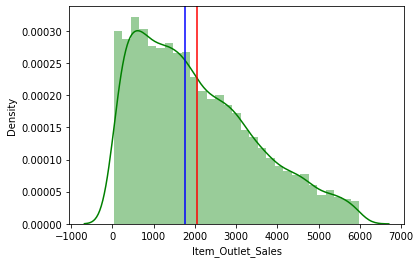

In [438]:
sns.distplot(df['Item_Outlet_Sales'],color="green")
plt.axvline(df['Item_Outlet_Sales'].mean(),color="red")
plt.axvline(df['Item_Outlet_Sales'].median(),color="blue")
plt.show()

#### Insights:
    1. In the Above Distplot of Item_Outlet_Sales mean is greater than median and tail is in right side so Item_Outlet_Sales is Right Skewed.

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8007 entries, 0 to 8006
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      8007 non-null   int64  
 1   Item_Identifier            8007 non-null   object 
 2   Item_Weight                8007 non-null   float64
 3   Item_Fat_Content           8007 non-null   object 
 4   Item_Visibility            8007 non-null   float64
 5   Item_Type                  8007 non-null   object 
 6   Item_MRP                   8007 non-null   float64
 7   Outlet_Identifier          8007 non-null   object 
 8   Outlet_Establishment_Year  8007 non-null   int64  
 9   Outlet_Size                8007 non-null   object 
 10  Outlet_Location_Type       8007 non-null   object 
 11  Outlet_Type                8007 non-null   object 
 12  Item_Outlet_Sales          8007 non-null   float64
dtypes: float64(4), int64(2), object(7)
memory usage:

## Data Visualization :-

In [440]:
df.head()

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1. Show the item outlet sales with respect to Item type.

In [441]:
print(df.groupby("Item_Type")['Item_Outlet_Sales'].sum())

Item_Type
Baking Goods             1.158311e+06
Breads                   4.949630e+05
Breakfast                1.750934e+05
Canned                   1.278857e+06
Dairy                    1.285180e+06
Frozen Foods             1.613070e+06
Fruits and Vegetables    2.420082e+06
Hard Drinks              4.037105e+05
Health and Hygiene       9.320534e+05
Household                1.834975e+06
Meat                     8.109917e+05
Others                   3.007152e+05
Seafood                  1.418713e+05
Snack Foods              2.434629e+06
Soft Drinks              7.800173e+05
Starchy Foods            3.071289e+05
Name: Item_Outlet_Sales, dtype: float64


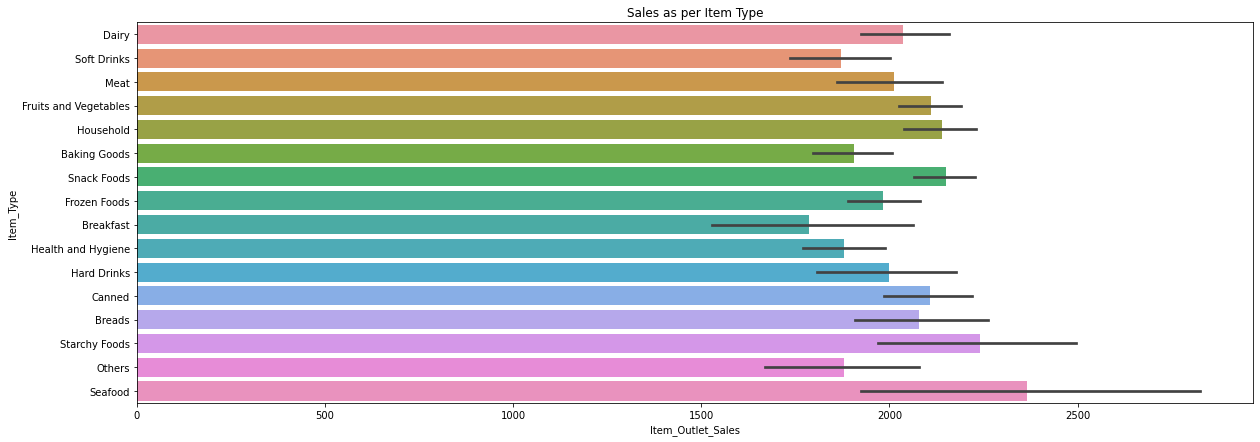

In [442]:
plt.figure(figsize=(20,7))
sns.barplot(x="Item_Outlet_Sales",y="Item_Type",data=df)
plt.title('Sales as per Item Type')
plt.show()

#### Insights:
    1. In the above bar diagram x axis shows Item_Outlet_Sales and y axis shows item_type.
    2. Seafood has Highest Item_Outlet_Sales.

2. Show Item Outlet sales as per Outlet type.

Text(0.5, 1.0, 'Sales as per Outlet Type')

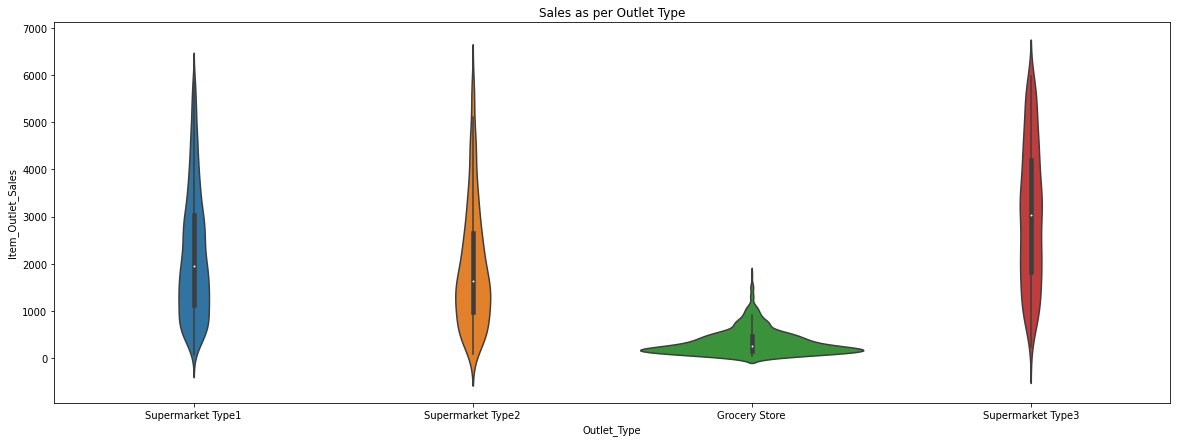

In [443]:
plt.figure(figsize=(20,7))
sns.violinplot(x="Outlet_Type",y="Item_Outlet_Sales",data=df)
plt.title("Sales as per Outlet Type")

#### Insights:
    1. In the above Violin diagram x axis shows Outlet_type and y axis shows Item_Outlet_Sales.
    2. Supermarket Type 1 has more data between 1000 and 2000 Item_Outlet_Sales.
    3. Supermarket Type 2 has more data between 1000 and 2000 Item_Outlet_Sales.
    4. Grocery Store has more data between 0 and 1000 Item_Outlet_Sales.
    5. Supermarket Type 3 has more data between 1000 and 5000 Item_Outlet_Sales.

3. Show the Count of Item_Fat_Content.

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

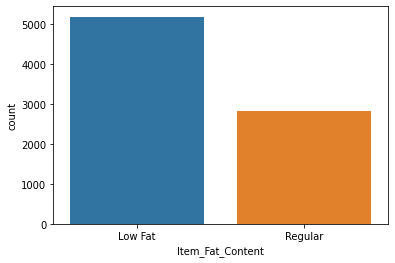

In [444]:
sns.countplot(df['Item_Fat_Content'])

4. Show Item Outlet Sales as per Outlet_Type with respect to Outlet_Size

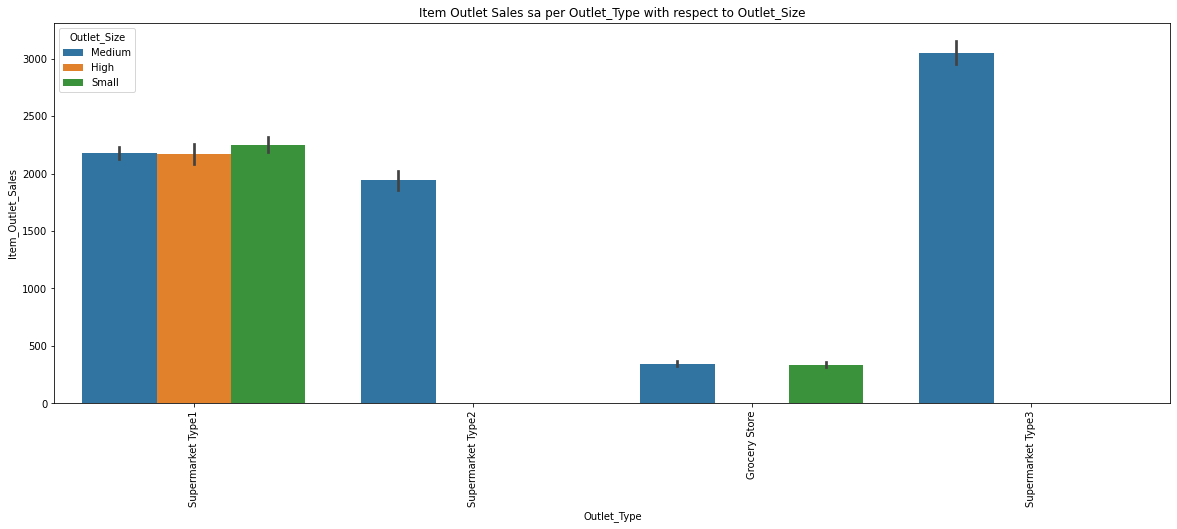

In [445]:
plt.figure(figsize=(20,7))
sns.barplot(x="Outlet_Type",y="Item_Outlet_Sales",hue="Outlet_Size",data=df)
plt.title("Item Outlet Sales sa per Outlet_Type with respect to Outlet_Size")
plt.xticks(rotation=90)
plt.show()

5. Show the Correlation between Item_Weight and Item_Outlet_Sales.

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

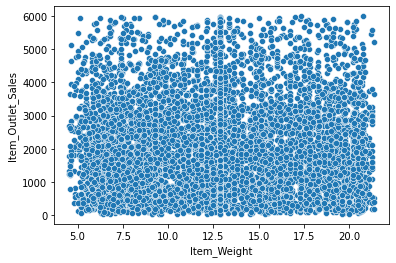

In [446]:
sns.scatterplot(x="Item_Weight", y="Item_Outlet_Sales",data=df)

#### Insights:
    1. There is no relation between Item_Weight and Item_Outlet_Sales.

6. Show the Correlation between Item_MRP and Item_Outlet_Sales.

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

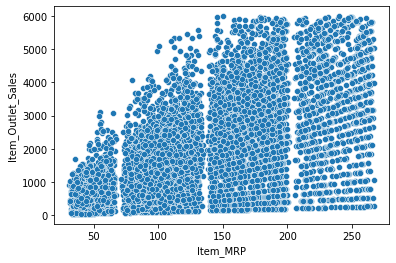

In [447]:
sns.scatterplot(x="Item_MRP", y="Item_Outlet_Sales",data=df)

#### Insights:
    1. There is Positive Relation between Item_Outlet_Sales and Item_MRP.

7. Show the Correlation using heatmap.

<AxesSubplot:>

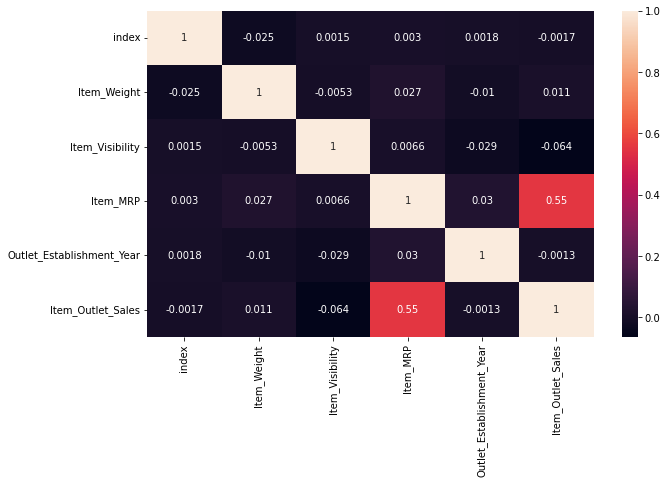

In [448]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

#### Insights:
    According to heat map Item_MRP is Slightly correlated with Item_outlet_Sales.

## Encoding

In [449]:
cat_cols=df.select_dtypes("O").columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [450]:
# Import label encoder
from sklearn import preprocessing

In [451]:
le=preprocessing.LabelEncoder()

In [452]:
for i in cat_cols:
    df[i]=le.fit_transform(df[i])

In [453]:
for i in cat_cols:
    print(i,df[i].unique())

Item_Identifier [ 155    8  659 ...  682 1512  931]
Item_Fat_Content [0 1]
Item_Type [ 4 14 10  6  9  0 13  5  2  8  7  3  1 15 11 12]
Outlet_Identifier [9 3 0 1 5 7 2 8 6 4]
Outlet_Size [1 0 2]
Outlet_Location_Type [0 2 1]
Outlet_Type [1 2 0 3]


In [454]:
# Dropping 'Item_Identifier','index','Outlet_Identifier'

In [455]:
df.drop(['Item_Identifier','index','Outlet_Identifier'],axis=1,inplace=True)
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,1,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,0,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8002,6.865,0,0.056783,13,214.5218,1987,0,2,1,2778.3834
8003,8.380,1,0.046982,0,108.1570,2002,1,1,1,549.2850
8004,10.600,0,0.035186,8,85.1224,2004,2,1,1,1193.1136
8005,7.210,1,0.145221,13,103.1332,2009,1,2,2,1845.5976


## Model Building: 

In [456]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [457]:
from sklearn.model_selection import train_test_split

In [458]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [459]:
X_train.shape

(6405, 9)

In [460]:
X_test.shape

(1602, 9)

In [461]:
y_train.shape

(6405,)

In [462]:
y_test.shape

(1602,)

### Linear Regression

In [463]:
from sklearn.linear_model import LinearRegression

In [464]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [465]:
y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

In [466]:
from sklearn.metrics import r2_score,mean_squared_error

In [467]:
def model_performance(y_actual,y_pred):
  r2=r2_score(y_actual,y_pred)
  RMSE=np.sqrt(mean_squared_error(y_actual,y_pred))
  print("R2 score:{}|RMSE: {}".format(round(r2,2),round(RMSE,2)))

In [468]:
print("Train Performance")
model_performance(y_train,y_pred_train)
print("Test Performance")
model_performance(y_test,y_pred_test)

Train Performance
R2 score:0.47|RMSE: 1043.09
Test Performance
R2 score:0.49|RMSE: 1027.67


## Ridge Lasso Regression :

In [469]:
from sklearn.linear_model import Ridge,Lasso 
from sklearn.model_selection import cross_val_score

### Lasso :

In [470]:
l1=Lasso(alpha=9)
l1.fit(X_train,y_train)
y_pred_train=l1.predict(X_train)
y_pred_test=l1.predict(X_test)

In [471]:
print("Train Performance")
model_performance(y_train,y_pred_train)
print("Test Performance")
model_performance(y_test,y_pred_test)

Train Performance
R2 score:0.47|RMSE: 1044.59
Test Performance
R2 score:0.49|RMSE: 1029.88


In [472]:
# Cross Validation Score
l1_score=cross_val_score(l1,X,y,scoring="r2",cv=5)
l1_score

array([0.47567374, 0.48421502, 0.45874469, 0.46875868, 0.46982491])

In [473]:
mean_l1_score=np.mean(l1_score)
mean_l1_score

0.4714434074715914

### Ridge :

In [474]:
r1=Ridge(alpha=9)
r1.fit(X_train,y_train)
y_pred_train=r1.predict(X_train)
y_pred_test=r1.predict(X_test)

In [475]:
print("Train Performance")
model_performance(y_train,y_pred_train)
print("Test Performance")
model_performance(y_test,y_pred_test)

Train Performance
R2 score:0.47|RMSE: 1043.2
Test Performance
R2 score:0.49|RMSE: 1027.86


In [476]:
# Cross Validation Score
r1_score=cross_val_score(r1,X,y,scoring="r2",cv=5)
r1_score

array([0.47929056, 0.48419757, 0.4598548 , 0.46846554, 0.47177868])

In [477]:
mean_r1_score=np.mean(r1_score)
mean_r1_score

0.4727174304215431